# Homework 1: Probability Review and Linear Regression

## Setup

To run and solve this assignment, you must have access to a working Jupyter Notebook installation. We recommend Google Colab. If you are already familiar with Jupyter and have your own installation, you may use it; however, you will have to tweak Colab-specific commands we've entered here (for example, file uploads).

To use Google Colab:

1. Download this `ipynb` file.
2. Navigate to https://colab.research.google.com/ and select `Upload` in the pop-up window.
3. Upload this file. It will then open in Colab.
4. Now, upload the dataset associated with this assignment to the Colab runtime. On the left side of the screen, click on "Files" (denoted by a **folder icon**) and then click on "Upload to session storage" (denoted by a **file icon with an up arrow**). Select the dataset (`BostonHousing.csv`).

The below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find Week 1 discussion material useful.

To run code in a cell or to render Markdown+LaTeX press Ctrl+Enter or "`Run`" button above. To edit any code or text cell, double-click on its content. Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. You can add cells via `+` sign at the top left corner.

**Submission instructions**: please upload your completed solution file as well as a scan of any handwritten answers to Gradescope by the due date (see Schedule).

## Probability Review

### 1. Conditional Distributions

Let's assume that COVID PCR test false positive rate is 0.02 (test positive
but is actually negative), false negative rate is 0.3 (test negative but is actually positive).
Assume that 30% of the population are actually having COVID. If one were to take a test and
receive a negative result, what is the likelihood that the person still has COVID? (Show your steps)

**Answer here:**

### 2. Expectation and Covariance

Let $X_1,X_2,X_3,X_4 \sim N(\mu,\sigma^2)$ sampled IID from known distributions. Define:

$$U = X_1 X_2 - 2X_3 X_4$$
$$V = X_2 X_3 + 2X_1 X_4$$

Answer the following questions in terms of $\mu$ and $\sigma$ :

**a.** Find $E[U]$ and $E[V]$.

**b.** What are $Var[U]$ and $Var[V]$?

**c.** What is $Cov[U,V]$?

**d.** What is covariance and what is correlation? Explain in your own words.

**e.** Show that the covariance of 2 independent random variables is zero but a zero covariance does not directly imply 2 random variables are independent? (hint: to show something is not true, you can try to come up with a counter-example)




**Answer here:**

### 3. Closed-Form Maximum Likelihood

Assume that we are given $n$ iid samples $(x_1, x_2, ..., x_n)$ from each $P(x \ | \ \theta)$ given below. Compute the maximum likelihood estimates (MLEs) for the parameter $\theta$ of the given distributions.

**a.** $P(x\ | \ \theta) = \theta^3 x^2 e^{-\theta x}$ for $x \geq 0$

**b.** $P(x\ | \ \theta_1, \theta_2) = \frac{1}{\theta_1\sqrt{2\pi}}e^{-\frac{1}{2}\frac{(x-\theta_2)^2}{\theta_1^2}}$

**c.**  $P(x \ | \ \theta) = \frac{1}{1-\theta^3}$ for $ \theta \leq x \leq 1$

**Answer here:**

## ML Basics with Python
The following section will walk you through performing basic ML operations with Python, including loading, splitting, and observing a dataset using `pandas`, `sklearn`, and `matplotlib`, as well as running linear regression over features of a dataset using `sklearn`'s built-in methods. Add you solution to the skeleton code whenever you see `###Add code here`

### 4. Basics of `numpy`: solving a linear system

#### 4.a. Using np.linalg.solve()

Let $A = \begin{bmatrix} 1 & 6 \\ 7  & 4 \end{bmatrix}$ and $b = \begin{bmatrix} -1 \\ 12 \end{bmatrix}$

Find $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ where $Ax=b$

In [1]:
import numpy as np

### ADD CODE HERE:
### Create numpy arrays for A and b

A = np.array([[1,6],[7,4]])
b = np.array([[-1],[12]])
#Solve for x using np.linalg.solve().
x = np.linalg.solve(A,b)
print(A,b,x)

[[1 6]
 [7 4]] [[-1]
 [12]] [[ 2. ]
 [-0.5]]


Now, let

$$A = \begin{bmatrix} 1 & 5 & 2 \\ 3 & 1 & 4 \\ -1 & 9 & 0 \end{bmatrix}, b = \begin{bmatrix} -2 \\ 7 \\ -11 \end{bmatrix}.$$

Try using np.linalg.solve() to find $x = [x_1, x_2, x_3]^T$. If you are unable to solve using np.linalg.solve() try using np.linalg.lstsq(). Does any other solution of this equation exist?

**Answer here:**

In [2]:
import numpy as np
### ADD CODE here
A = np.array([[1,5,2],[3,1,4],[-1,9,0]])
b = np.array([[-2],[7],[-11]])

x = np.linalg.solve(A,b)

print(x)

[[ 2.64285714]
 [-0.92857143]
 [ 0.        ]]


To check if any other solution exists, you can perform the following steps:

- Compute the rank of matrix A.
- Compute the rank of the augmented matrix [A|b].
- Compare the ranks obtained in steps 1 and 2.

In [3]:
import numpy as np

A = np.array([[1, 5, 2], [3, 1, 4], [-1, 9, 0]])
b = np.array([[-2], [7], [-11]])

rank_A = np.linalg.matrix_rank(A)

augmented_matrix = np.hstack((A, b))
rank_augmented = np.linalg.matrix_rank(augmented_matrix)

if rank_A == rank_augmented:
    print("There is a unique solution, and it is:")
    x = np.linalg.solve(A, b)
    print(x)
else:
    print("There are infinitely many solutions.")


There is a unique solution, and it is:
[[ 2.64285714]
 [-0.92857143]
 [ 0.        ]]


#### 4.b. Using matrix multiplication

Solve for $x$ and print out its value: $ x = \begin{bmatrix} 2 & 2 & 2 \end{bmatrix} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix} \begin{bmatrix} 3 \\ 3 \\ 3 \end{bmatrix}$

In [4]:
### ADD CODE HERE:

a = np.array([[2,2,2]])
b = np.ones((3,3))
c = np.array([[3],[3],[3]])

x = a@b@c
print(x)

[[54.]]


### 5. Data Visualization with `pandas` and `matplotlib`

In the following set of problems, we'll look at how we can use linear regression to predict the price of a house in Boston based on its various features.

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows:

**1.CRIM**: per capita crime rate by town

**2.ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.

**3.INDUS**: proportion of non-retail business acres per town

**4.CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**5.NOX**: nitric oxides concentration (parts per 10 million)

**6.RM**: average number of rooms per dwelling

**7.AGE**: proportion of owner-occupied units built prior to 1940

**8.DIS**: weighted distances to ﬁve Boston employment centers

**9.RAD**: index of accessibility to radial highways

**10.TAX**: full-value property-tax rate per $10,000

**11.PTRATIO**: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population

**12. MEDV**: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.

#### Load the dataset and look at the features
First, we'll use `pandas` to load the dataset and use the `head()` function to get a glimpse of the dataset

In [5]:
import pandas as pd
housing_data = pd.read_csv("BostonHousing.csv")
housing_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2


We can also use `describe()` function to see the distribution of the data.

In [6]:
housing_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000


#### 5.a. Visualize the features
We're going to model Boston housing price using a linear regression model. To do that, we'd like to visualize the data and choose features that are well-suited for a linear model. Use `matplotlib` to plot each feature in the `housing` list below against the target, `medv`.

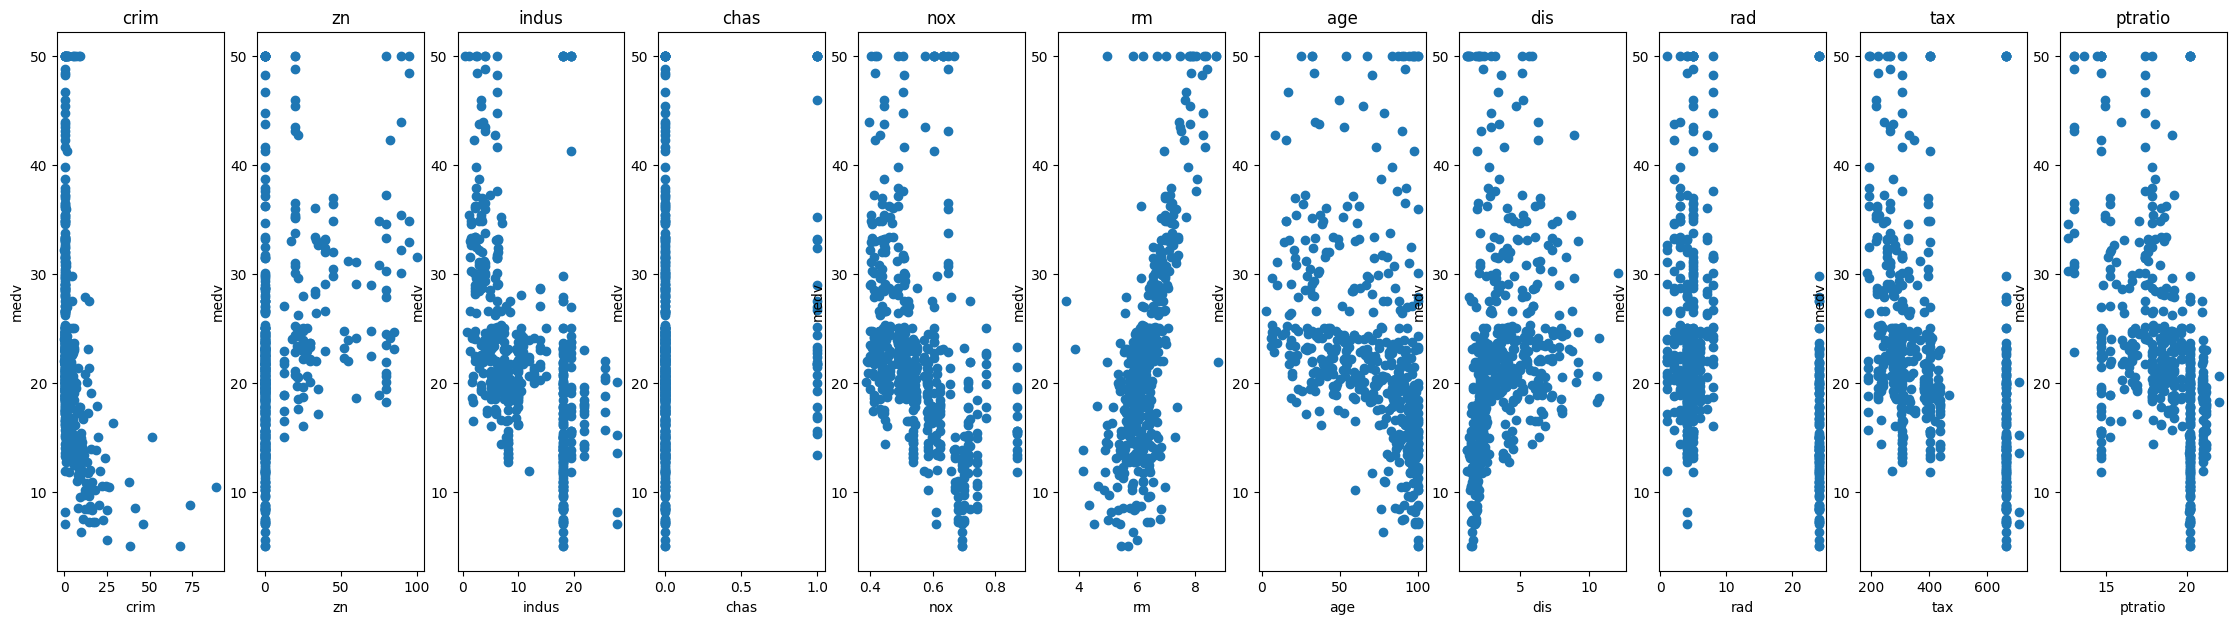

In [7]:
import matplotlib.pyplot as plt
housing_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio']
target = housing_data['medv']

# Create a figure to hold our plots
plt.figure(figsize=(28, 7))
for i, feature in enumerate(housing_features):
    # Create subplots for each feature within this figure
    plt.subplot(1, len(housing_features) , i+1)
    ### ADD CODE HERE:
    ### Set `x` (The feature we want to plot)
    ### and `y` (The value that we want to estimate)
    
    x = housing_data[feature]
    y = target


    ###
    plt.scatter(x, y, marker='o')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('medv')

#### 5.b. Select the best feature for a linear regression model
Which feature looks like it would work well for fitting a linear regression model? Pick just one, and assign it to the variable called `price_features`. *There might be more than one correct answer, feel free to experiment with all the features.*

In [8]:
### ADD CODE HERE:
### Set `price_features` (A feature to use to fit our linear regression model)

price_features = housing_data['rm']

###
price_labels = housing_data['medv']

***Briefly explain your rationale for choosing this feature in the cell below. Also, pick one of the features that you didn't choose and explain why that feature is not good for our purpose.***

**Answer here:** we look for the direction of the relationship between the feature and the target variable.
- A positive relationship means that as the feature increases, the target variable tends to increase. thats why we choose 'rm'
- A negative relationship means that as the feature increases, the target variable tends to decrease.
- No clear pattern indicates a weak or non-existent relationship. like 'age'

we determined feature based on if the relationship appears to be linear or non-linear. In a linear relationship, the data points tend to follow a straight line. In a non-linear relationship, the data points may follow a curve or some other pattern.

### 6. Train-Test Splits

Train-test splitting is a fundamental practice in machine learning. When fitting a model, we'd to divide our data into separate training and testing sets in order to fairly evaluate how our model performs. In this section, we will learn two ways to split our datasets: using `numpy` and `sklearn`. First, let us convert our panda dataframes to numpy array

In [9]:
import numpy as np
# Convert our pandas dataframes (price_features and price_labels) to numpy arrays using np.asarray()
price_features = np.asarray(price_features).reshape(-1,1)
price_labels = np.asarray(price_labels).reshape(-1,1)

#### 6.1. Spliting data using `numpy`

First, let us shuffle our data (feel free to comment out the shuffling to see if there's anything change). This is a very common practice in ML to make the data "random" and improve the
generalization of the model at the end. To do this, we first need to stack our data to keep the indices correct.

In [10]:
#combine the features and the labels to a data matrix. The feature is the first row, the label is the second row
data_matrix = np.stack([price_labels, price_features], axis = 0)
# shuffle our data
np.random.shuffle(data_matrix)

Now that we have a "random" data matrix, let us split the matrix into train set and test set.

In [11]:
### Add code here
### Split the data_matrix into x_train_np, x_test_np, y_train_np, y_test_np where (x_train_np, y_train_np) is the training set  and (x_test_np, y_test_np) is the test set
### (the training set is typically 80% the length of the whole dataset).
### Print out the shape of x_train_np and x_test_np.

total_samples = data_matrix.shape[1]
train_size = int(0.8 * total_samples)

x_train_np = data_matrix[0][:train_size]
x_test_np = data_matrix[0][train_size:]
y_train_np = data_matrix[1][:train_size]
y_test_np = data_matrix[1][train_size:]


print('Shape of x_train_np',x_train_np.shape)
print('Shape of x_test_np',x_test_np.shape)

Shape of x_train_np (404, 1)
Shape of x_test_np (102, 1)


#### 6.2. Splitting data using `sklearn`

Now we know how to split the train/test set manually using `numpy`, let us look at how we can split the data using `train_test_split`, which is a more common way to split the dataset. *Refer to, the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to better understand how this method is used.* Observe the sizes of the resulting datasets, and which samples were placed where.

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert our pandas dataframes to numpy arrays
price_features = np.asarray(price_features).reshape(-1,1)
price_labels = np.asarray(price_labels).reshape(-1,1)

### ADD CODE HERE:
### Use train_test_split to split the price_features and price_lables into training and testing sets.
### Print out the resulting data splits and their sizes.

x_train_np, x_test_np, y_train_np, y_test_np = train_test_split(price_features, price_labels, test_size=0.20, random_state=42)

print('Shape of x_train_np',x_train_np.shape)
print('Shape of x_test_np',x_test_np.shape)

print('x_train_np',x_train_np)
print('x_test_np',x_test_np)


Shape of x_train_np (404, 1)
Shape of x_test_np (102, 1)
x_train_np [[5.304]
 [5.834]
 [6.031]
 [6.103]
 [5.727]
 [6.431]
 [6.037]
 [6.383]
 [6.152]
 [6.852]
 [6.31 ]
 [6.144]
 [7.163]
 [6.208]
 [7.765]
 [5.599]
 [5.707]
 [6.481]
 [5.593]
 [6.487]
 [5.957]
 [6.021]
 [6.169]
 [6.041]
 [6.516]
 [7.155]
 [6.152]
 [7.82 ]
 [5.613]
 [6.333]
 [6.072]
 [6.092]
 [5.186]
 [6.425]
 [6.059]
 [6.816]
 [6.604]
 [5.924]
 [5.99 ]
 [6.345]
 [5.787]
 [5.404]
 [5.531]
 [6.249]
 [6.129]
 [6.406]
 [5.813]
 [8.725]
 [6.436]
 [6.251]
 [6.43 ]
 [6.176]
 [5.682]
 [5.935]
 [5.926]
 [6.398]
 [6.998]
 [5.683]
 [6.153]
 [5.741]
 [6.195]
 [6.376]
 [5.56 ]
 [6.674]
 [8.398]
 [6.185]
 [5.813]
 [6.172]
 [5.983]
 [6.474]
 [5.85 ]
 [6.943]
 [6.437]
 [5.872]
 [6.254]
 [6.546]
 [7.178]
 [6.538]
 [4.903]
 [4.906]
 [5.52 ]
 [6.212]
 [6.826]
 [6.951]
 [6.749]
 [5.019]
 [6.683]
 [5.878]
 [6.251]
 [6.319]
 [5.569]
 [5.887]
 [5.987]
 [6.8  ]
 [6.718]
 [6.229]
 [6.411]
 [6.13 ]
 [6.442]
 [5.012]
 [6.879]
 [7.236]
 [6.167]
 [6.4

### 7. Linear Regression
Now, we'll fit a linear regression model to our data using `sklearn`'s built-in linear regression method. We will also test the model with our test data, and see how it performs.

#### 7.a. Fit the linear regression model with our data
Use `sklearn`'s built-in linear regression method to fit a model using the training data you got as a result of problem 6. *Refer to the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to better understand how this method is used.*

In [13]:
from sklearn.linear_model import LinearRegression

### ADD CODE HERE:
### Use the LinearRegression() method to fit a model using the training data. You can use either the training data that you
### split using sklearn or numpy. If you implemented everything correctly, they should yield the same result.

lr = LinearRegression()
lr.fit(x_train_np,y_train_np)
###

LinearRegression()

#### 7.b. Plot the data against the model
Use `matplotlib` to visualize the fit of the model alongside the housing feature data. You will need to extract the parameters of the model, the coefficient $w$ and the intercept $b$, to do this.

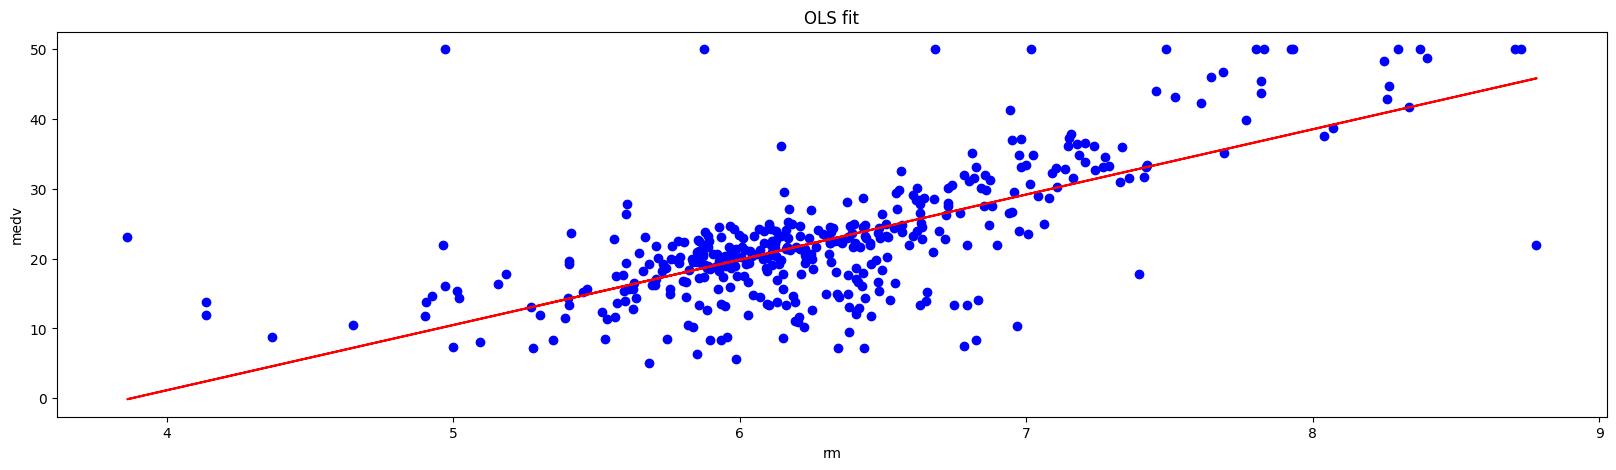

In [14]:
### ADD CODE HERE:
### Extract the coefficient of the model, w
### Extract the intercept of the model, b
w = lr.coef_
b = lr.intercept_
###

# Create plot figure
plt.figure(figsize=(20, 5))
### ADD CODE HERE:
### Use plt.plot() to plot the model curve
### Use plt.scatter() to plot the original feature data

y_pred = w * x_train_np + b

plt.scatter(x_train_np, y_train_np, label="Data Points", color="blue")
plt.plot(x_train_np, y_pred, label="Linear Regression Line", color="red")

###
plt.title("OLS fit")
plt.xlabel("rm") # change 'your feature' to the feature that you choose to plot
plt.ylabel("medv")
plt.show()

#### 7.c. Plot the true targets against our estimated values
Let's see how well our model performs! Plot the model's estimates of the price targets on our test data from problem 5 alongside the real values. Include the model fit as well for clarity.

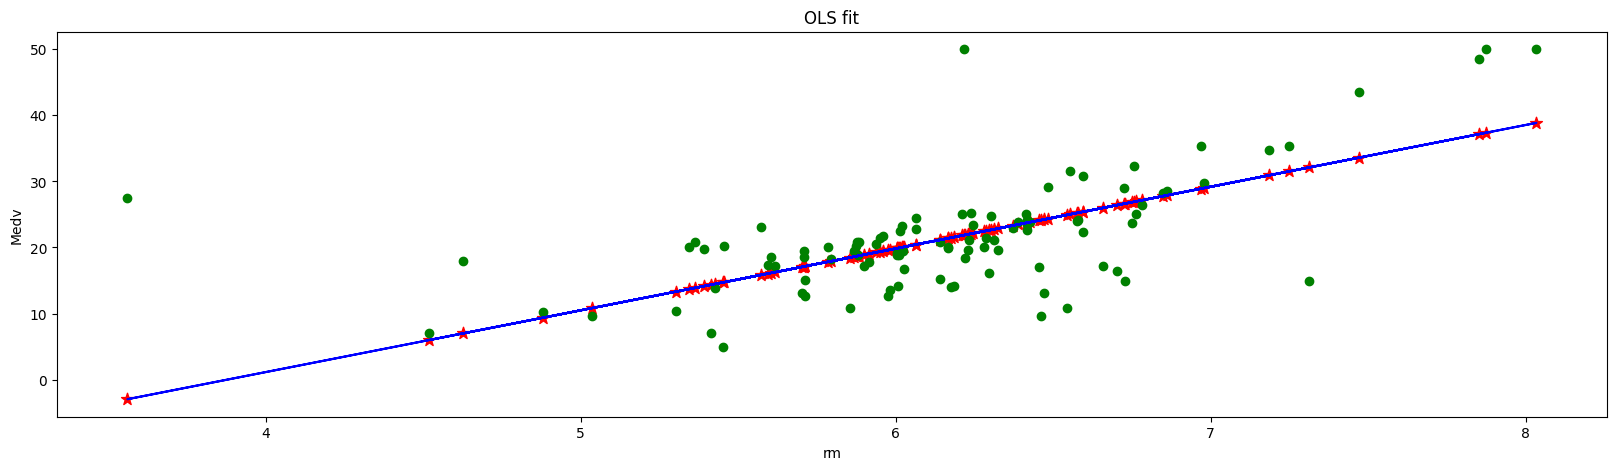

In [15]:
plt.figure(figsize=(20, 5))
### ADD CODE HERE:
### Use plt.plot() to plot the model curve
### Use plt.scatter() to plot the test data and corresponding values estimated by our model
### Use plt.scatter() to plot the test data and corresponding target values

y_pred = w * x_test_np + b

plt.plot(x_test_np, y_pred, label="Linear Regression Line", color="blue")
plt.scatter(x_test_np, y_pred, label="Data Points", color="red",marker='*',s=80)
plt.scatter(x_test_np, y_test_np, label="Data Points", color="green")

###
plt.title("OLS fit")
plt.xlabel("rm") # change 'your feature' to the feature that you choose to plot
plt.ylabel("Medv")
plt.show()